In [295]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [296]:
df = pd.read_csv('dados_treino_v8.csv', sep='|')
df.head()

,internacao,DT_ATENDIMENTO,MP10,O3,TEMP,UR,DS_CID,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,ENTRE_5_9_ANOS,ENTRE_10_14_ANOS,ENTRE_15_18_ANOS,TP_SEXO
0,0,2022-01-01,28.620098,31.930049,21.833099,80.276419,AMIGDALITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,0,0,0,1,F
1,0,2022-01-01,22.559984,28.459289,21.524707,81.938460,ASMA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M
2,0,2022-01-01,23.173989,29.115721,20.771323,87.768694,BRONQUIOLITE AGUDA,0,0,0,1,1,0,0,0,0,M
3,1,2022-01-01,29.538983,30.253300,21.908878,79.161412,BRONQUIOLITE AGUDA DEVIDA A VIRUS SINCICIAL RE...,0,0,0,1,1,0,0,0,0,F
4,0,2022-01-01,33.311234,26.157899,21.339680,81.960879,BRONQUITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M


In [297]:
df = pd.get_dummies(df, columns=["TP_SEXO", "DS_CID"], dtype='int')
df.head()

,internacao,DT_ATENDIMENTO,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0,2022-01-01,28.620098,31.930049,21.833099,80.276419,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2022-01-01,22.559984,28.459289,21.524707,81.938460,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2022-01-01,23.173989,29.115721,20.771323,87.768694,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,2022-01-01,29.538983,30.253300,21.908878,79.161412,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2022-01-01,33.311234,26.157899,21.339680,81.960879,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [298]:
headers = list(df.columns)[2:]
X = df[headers]
y = df['internacao']
df[headers].head()

,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,28.620098,31.930049,21.833099,80.276419,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22.559984,28.459289,21.524707,81.938460,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,23.173989,29.115721,20.771323,87.768694,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,29.538983,30.253300,21.908878,79.161412,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33.311234,26.157899,21.339680,81.960879,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [299]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
colunas_normalizar = ['MP10', 'O3', 'TEMP', 'UR']
X.loc[:, colunas_normalizar] = scaler.fit_transform(X.loc[:, colunas_normalizar])
X[headers].head()


,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0.217744,0.254960,0.688959,0.771206,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.167354,0.225945,0.674581,0.790496,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.172460,0.231433,0.639458,0.858161,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.225385,0.240942,0.692492,0.758266,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.256751,0.206706,0.665955,0.790756,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [300]:
# a partir daqui
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTEN, SMOTE

#over sampling
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

borderline_smote = SMOTEN()
X_train, y_train = borderline_smote.fit_resample(X_train, y_train)

In [280]:
#under sampling
# rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [281]:
# For tree model, it's either "gain", "weight", "cover", "total_gain" or "total_cover"
# xgb_model  = XGBClassifier(importance_type='weight')
xgb_model_bp  = XGBClassifier()

### hiperparametros
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }
param_grid = {
    'n_estimators': [300, 400],
    'learning_rate': [0.2, 0.3],
    'max_depth': [13],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
grid_search = GridSearchCV(estimator=xgb_model_bp, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Melhores hiperparâmetros: ", best_params)

# xgb_model = XGBClassifier(**best_params)
# xgb_model.fit(X_train, y_train)
# y_pred=xgb_model.predict(X_test)

# joblib.dump(logistic_regression, "dados_treino_2022.pkl")

Melhores hiperparâmetros:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 13, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Crie os modelos de nível 0
level0 = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('logistic_regression', LogisticRegression())
]

# Crie o modelo de nível 1
level1 = XGBClassifier(**best_params)

stacking_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)


In [282]:
df_test = pd.DataFrame(X_test, columns=df.columns)  # Certifique-se de que column_names contenha os nomes das colunas de X_test
df_test["internacao"] = y_pred
df_test.to_csv("predictions_with_features.csv", index=False)

<Axes: xlabel='Predicted', ylabel='Actual'>

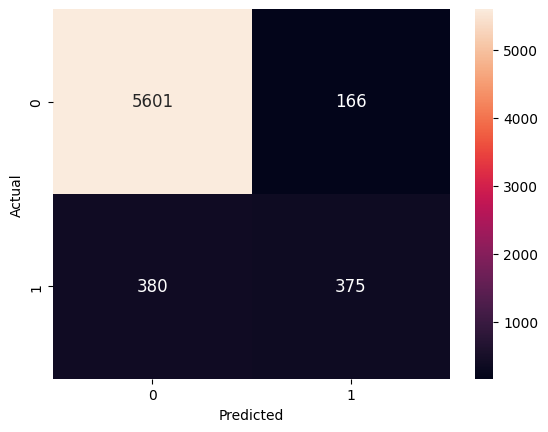

In [283]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 12}, fmt='d')

In [284]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

recall = metrics.recall_score(y_test, y_pred)
print('Sensitivity (Recall):', recall)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)

print ('Specificity: ', specificity)

precision = tp / (tp + fp)
print('Precision:', precision)

NPV = tn / (tn + fn)
print('NPV:', NPV)

Accuracy:  0.9162833486660533
Sensitivity (Recall): 0.4966887417218543
Specificity:  0.9712155366741807
Precision: 0.6931608133086876
NPV: 0.9364654740010032


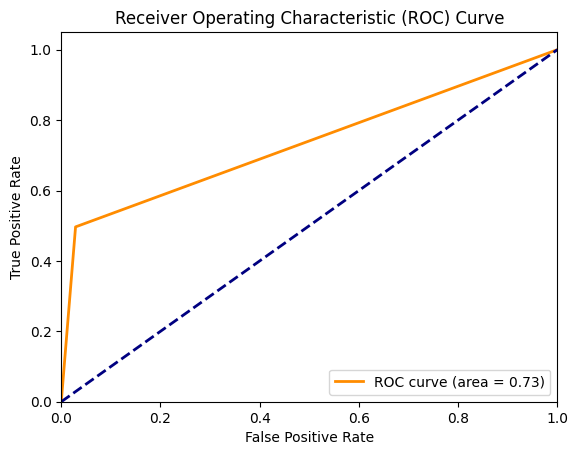

In [285]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [286]:
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Print or display the feature importances
feature_importance_df.to_csv("feature_importances.csv", index=False)

                                               Feature  Importance
67   DS_CID_INFECCAO AGUDA DAS VIAS AEREAS SUPERIOR...    0.094166
91          DS_CID_NASOFARINGITE AGUDA RESFRIADO COMUM    0.063640
36   DS_CID_BRONQUIOLITE AGUDA DEVIDA A VIRUS SINCI...    0.056398
78             DS_CID_INSUFICIENCIA RESPIRATORIA AGUDA    0.036579
41   DS_CID_BRONQUITE AGUDA DEVIDA A VIRUS SINCICIA...    0.035607
..                                                 ...         ...
74   DS_CID_INFLUENZA GRIPE COM OUTRAS MANIFESTACOE...    0.000000
69   DS_CID_INFECCOES AGUDAS NAO ESPECIFICADA DAS V...    0.000000
60   DS_CID_FARINGITE AGUDA DEVIDA A OUTROS MICROOR...    0.000000
56                       DS_CID_ESTADO DE MAL ASMATICO    0.000000
142                             DS_CID_TRAQUEITE AGUDA    0.000000

[143 rows x 2 columns]


In [287]:
# xgb_model = XGBClassifier(importance_type='gain')
# xgb_model.fit(X_resampled, y_resampled)
# y_pred = xgb_model.predict(X_test)
